In [42]:
import pandas as pd

file_path = "/Users/mali/Desktop/UW/Climate Risk/WA OR CA Utility.xlsx"
xls = pd.ExcelFile(file_path)

df = pd.read_excel(xls, sheet_name='Summary', header=3)

df.dropna(how='all', inplace=True)

if df.iloc[0].str.contains("Issuer Name").any():
    df.columns = df.iloc[0]
    df = df.drop(index=0)

df_util = df[df['Issuer Name'].astype(str).str.contains("Pub Util Dist", na=False)]

print(df_util.head())


0   Issue Symbol                                         Issue Name  \
406     045209AA  Asotin Cnty Wash Pub Util Dist No 1 Util Sys R...   
407     045209AB  Asotin Cnty Wash Pub Util Dist No 1 Util Sys R...   
408     045209AC  Asotin Cnty Wash Pub Util Dist No 1 Util Sys R...   
409     045209AD  Asotin Cnty Wash Pub Util Dist No 1 Util Sys R...   
410     045209AE  Asotin Cnty Wash Pub Util Dist No 1 Util Sys R...   

0         State Purpose Class  Issue Date Yield to Maturity Maturity Date  \
406  Washington       Utility  08/07/2024          3.498177    12/01/2025   
407  Washington       Utility  08/07/2024          3.204547    12/01/2026   
408  Washington       Utility  08/07/2024          3.282054    12/01/2027   
409  Washington       Utility  08/07/2024          3.311205    12/01/2028   
410  Washington       Utility  08/07/2024          3.358926    12/01/2029   

0   9-digit CUSIP                                       Issuer Name  \
406     045209AA1  Asotin Cnty Wash Pub

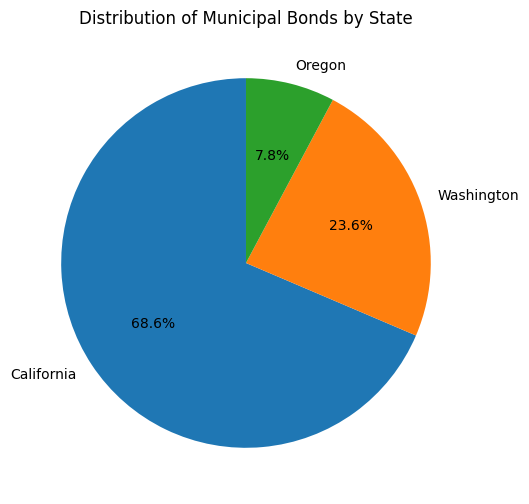

State
California    9887
Washington    3406
Oregon        1123
Name: count, dtype: int64


In [43]:
import matplotlib.pyplot as plt

# Count number of bonds per state
state_counts = df['State'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Municipal Bonds by State")
plt.show()

print(state_counts)

In [44]:
import json
import pandas as pd

json_path = "/Users/mali/Desktop/UW/Climate Risk/county_to_service_area.json"
with open(json_path, 'r') as file:
    county_to_service_area = json.load(file)

df_service_area = pd.DataFrame(list(county_to_service_area.items()), columns=["Issuer Name", "Service Area"])

print(df_service_area)


                                           Issuer Name  \
0         Redding Calif Jt Pwrs Fing Auth Elec Sys Rev   
1    Alameda Cnty Calif Wtr Dist Fing Auth Wtr Sys Rev   
2    Sacramento Calif Mun Util Dist Iam Coml Paper ...   
3    Imperial Irr Dist Calif Elec & Wtr Sys Proj Re...   
4    Klickitat Cnty Wash Pub Util Dist No 001 Elec Rev   
..                                                 ...   
129  Snohomish Cnty Wash Pub Util Dist No 001 Elec Rev   
130   Snohomish Cnty Wash Pub Util Dist No 001 Wtr Rev   
131  Snohomish Cnty Wash Pub Util Dist No 001 Gener...   
132     South Tahoe Calif Pub Util Dist Wastewater Rev   
133      Thurston Cnty Wash Pub Util Dist No 1 Wtr Rev   

                       Service Area  
0            CITY OF REDDING - (CA)  
1           ALAMEDA MUNICIPAL POWER  
2    SACRAMENTO MUNICIPAL UTIL DIST  
3      IMPERIAL IRRIGATION DISTRICT  
4      PUD NO 1 OF KLICKITAT COUNTY  
..                              ...  
129       PUD 1 OF SNOHOMISH COUNTY  

In [45]:
import json

with open("/Users/mali/Desktop/UW/Climate Risk/county_to_service_area.json", "r") as f:
    county_to_service_area = json.load(f)

df_util['Service Area'] = df_util['Issuer Name'].map(county_to_service_area)

print(df_util[['Issuer Name', 'Service Area']].head())


0                                         Issuer Name  \
406  Asotin Cnty Wash Pub Util Dist No 1 Util Sys Rev   
407  Asotin Cnty Wash Pub Util Dist No 1 Util Sys Rev   
408  Asotin Cnty Wash Pub Util Dist No 1 Util Sys Rev   
409  Asotin Cnty Wash Pub Util Dist No 1 Util Sys Rev   
410  Asotin Cnty Wash Pub Util Dist No 1 Util Sys Rev   

0                 Service Area  
406  PUD NO 1 OF ASOTIN COUNTY  
407  PUD NO 1 OF ASOTIN COUNTY  
408  PUD NO 1 OF ASOTIN COUNTY  
409  PUD NO 1 OF ASOTIN COUNTY  
410  PUD NO 1 OF ASOTIN COUNTY  


/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/3004026906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_util['Service Area'] = df_util['Issuer Name'].map(county_to_service_area)


In [46]:
import pandas as pd

file_path = "/Users/mali/Desktop/UW/Climate Risk/msrb_transaction.csv.gz"
df_msrb = pd.read_csv(file_path)

print(df_msrb.head(10))

print(df_msrb.columns)


/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/1175541363.py:4: DtypeWarning: Columns (2,9,16,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_msrb = pd.read_csv(file_path)


       cusip  trade_date rtrs_control_number trade_type_indicator  \
0  006797BF0  2014-12-18    E4F0BD9EB1C65CD0                    S   
1  006797BG8  2017-12-14    6220FA8E4909EA98                    S   
2  006797BG8  2017-12-14    9A213833EB40CE15                    S   
3  006797BG8  2017-12-14    F984EE431D754186                    D   
4  006797BG8  2017-12-14    A496D1139BCFE544                    S   
5  006797BG8  2018-01-08    3701A0B3CF08D03A                    P   
6  006797BG8  2018-01-08    3C117A1882E8F33C                    S   
7  006797BG8  2018-01-29    73B393A9BB2DA6B5                    D   
8  006797BG8  2018-01-29    D755BEAADE15255C                    P   
9  006797BG8  2018-01-29    FBEB90F4D5C5BC36                    D   

                                security_description  dated_date  coupon  \
0   ADELANTO CALIF PUB UTIL AUTH UTIL SYS PROJ-SER A  2014-12-30    5.00   
1  ADELANTO CALIF PUB UTIL AUTH REF-TAXABLE-UTIL ...  2017-12-28    4.25   
2  ADELANTO 

In [7]:
print(df_util.columns.tolist())

['Issue Symbol', 'Issue Name', 'State', 'Purpose Class', 'Issue Date', 'Yield to Maturity', 'Maturity Date', '9-digit CUSIP', 'Issuer Name', 'Amout Outstanding', 'Amount Outstanding Effective Date', 'Call Flag', 'Insurance Flag', 'Coupon Rate', 'Service Area']


In [47]:
df_merged = df_msrb.merge(
    df_util[['9-digit CUSIP', 'Amout Outstanding', 'Call Flag', 'Insurance Flag', 'Service Area']],
    left_on='cusip',
    right_on='9-digit CUSIP',
    how='inner'
)

print(df_merged.head())

       cusip  trade_date rtrs_control_number trade_type_indicator  \
0  045209AA1  2024-07-26    2024072602236400                    S   
1  045209AA1  2024-07-26    2024072602236500                    S   
2  045209AA1  2024-07-26    2024072602189700                    D   
3  045209AB9  2024-07-25    2024072505515100                    S   
4  045209AB9  2024-07-29    2024072908712300                    S   

                               security_description  dated_date  coupon  \
0  ASOTIN CNTY WASH PUB UTIL DIST NO 1 UTIL SYS REV  2024-08-07     5.0   
1  ASOTIN CNTY WASH PUB UTIL DIST NO 1 UTIL SYS REV  2024-08-07     5.0   
2  ASOTIN CNTY WASH PUB UTIL DIST NO 1 UTIL SYS REV  2024-08-07     5.0   
3  ASOTIN CNTY WASH PUB UTIL DIST NO 1 UTIL SYS REV  2024-08-07     5.0   
4  ASOTIN CNTY WASH PUB UTIL DIST NO 1 UTIL SYS REV  2024-08-07     5.0   

  maturity_date when_issued_indicator assumed_settlement_date  ...  \
0    2025-12-01                     Y                     NaN  .

In [48]:
df_merged['maturity_date'] = pd.to_datetime(df_merged['maturity_date'])
df_merged['trade_date'] = pd.to_datetime(df_merged['trade_date'])

df_merged['years_to_maturity'] = (df_merged['maturity_date'] - df_merged['trade_date']).dt.days / 365.25
df_merged['years_to_maturity'] = df_merged['years_to_maturity'].round()

print(df_merged.head())

       cusip trade_date rtrs_control_number trade_type_indicator  \
0  045209AA1 2024-07-26    2024072602236400                    S   
1  045209AA1 2024-07-26    2024072602236500                    S   
2  045209AA1 2024-07-26    2024072602189700                    D   
3  045209AB9 2024-07-25    2024072505515100                    S   
4  045209AB9 2024-07-29    2024072908712300                    S   

                               security_description  dated_date  coupon  \
0  ASOTIN CNTY WASH PUB UTIL DIST NO 1 UTIL SYS REV  2024-08-07     5.0   
1  ASOTIN CNTY WASH PUB UTIL DIST NO 1 UTIL SYS REV  2024-08-07     5.0   
2  ASOTIN CNTY WASH PUB UTIL DIST NO 1 UTIL SYS REV  2024-08-07     5.0   
3  ASOTIN CNTY WASH PUB UTIL DIST NO 1 UTIL SYS REV  2024-08-07     5.0   
4  ASOTIN CNTY WASH PUB UTIL DIST NO 1 UTIL SYS REV  2024-08-07     5.0   

  maturity_date when_issued_indicator assumed_settlement_date  ...  \
0    2025-12-01                     Y                     NaN  ...   


In [49]:
df_benchmark = pd.read_csv("/Users/mali/Desktop/UW/Climate Risk/Tradeweb_MUNI_data.csv")
df_benchmark.rename(columns={df_benchmark.columns[0]: "trade_date"}, inplace=True)
df_benchmark['trade_date'] = pd.to_datetime(df_benchmark['trade_date'])

df_benchmark_long = df_benchmark.melt(
    id_vars="trade_date",
    var_name="years_to_maturity",
    value_name="benchmark_yield"
)

df_benchmark_long['years_to_maturity'] = df_benchmark_long['years_to_maturity'].str.extract(r'(\d+)').astype(int)

print(df_benchmark_long)

      trade_date  years_to_maturity  benchmark_yield
0     2025-04-10                  1            3.063
1     2025-04-09                  1            3.019
2     2025-04-08                  1            2.776
3     2025-04-07                  1            2.579
4     2025-04-04                  1            2.554
...          ...                ...              ...
31465 2021-02-04                 30            1.401
31466 2021-02-03                 30            1.677
31467 2021-02-02                 30            1.667
31468 2021-02-01                 30            1.662
31469 2021-01-29                 30            1.656

[31470 rows x 3 columns]


In [50]:
df_final = df_merged.merge(
    df_benchmark_long,
    on=['trade_date', 'years_to_maturity'],
    how='left'
)

df_final['spread'] = df_final['yield'] - df_final['benchmark_yield']

print(df_final)
print(df_final.columns.tolist())

           cusip trade_date rtrs_control_number trade_type_indicator  \
0      045209AA1 2024-07-26    2024072602236400                    S   
1      045209AA1 2024-07-26    2024072602236500                    S   
2      045209AA1 2024-07-26    2024072602189700                    D   
3      045209AB9 2024-07-25    2024072505515100                    S   
4      045209AB9 2024-07-29    2024072908712300                    S   
...          ...        ...                 ...                  ...   
61209  962468FA7 2021-01-29    2021012904121500                    S   
61210  962468FA7 2021-01-29    2021012904624000                    S   
61211  962468FA7 2023-11-20    2023112013908400                    P   
61212  962468FA7 2023-11-29    2023112903561600                    D   
61213  962468FA7 2023-11-29    2023112903856300                    S   

                                    security_description  dated_date  coupon  \
0       ASOTIN CNTY WASH PUB UTIL DIST NO 1 UTIL SYS RE

In [52]:
# Filter:
df_filtered = df_final[
    (df_final['yield'] >= 0) &                              # Exclude negative yields
    (df_final['dollar_price'] <= 150) &                     # Exclude prices above $150
    (df_final['dollar_price'] >= 50) &                      # Exclude prices below $50
    (df_final['coupon'] <= 20) &                            # Exclude coupon rates > 20%
    (df_final['years_to_maturity'] <= 30)                   # Exclude time-to-maturity > 30 years
]

# Filter to only include bonds traded at least 10 times
trade_counts = df_filtered['cusip'].value_counts()
valid_cusips = trade_counts[trade_counts >= 10].index
df_filtered = df_filtered[df_filtered['cusip'].isin(valid_cusips)]

df_filtered = df_filtered.reset_index(drop=True)

print(df_filtered)


           cusip trade_date rtrs_control_number trade_type_indicator  \
0      045209AK9 2024-07-25    2024072505266200                    D   
1      045209AK9 2024-07-25    2024072507849300                    S   
2      045209AK9 2024-07-25    2024072507854700                    S   
3      045209AK9 2024-07-25    2024072507858400                    S   
4      045209AK9 2024-07-25    2024072507860800                    S   
...          ...        ...                 ...                  ...   
58055  962468EZ3 2024-10-30    2024103014383100                    D   
58056  962468EZ3 2024-10-30    2024103014408700                    D   
58057  962468EZ3 2024-10-30    2024103014566700                    S   
58058  962468EZ3 2024-10-30    2024103014566800                    D   
58059  962468EZ3 2024-10-30    2024103014573300                    D   

                                    security_description  dated_date  coupon  \
0       ASOTIN CNTY WASH PUB UTIL DIST NO 1 UTIL SYS RE

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Define maturity buckets
bins = [0, 5, 10, 30]
labels = ['≤5 Years', '5–10 Years', '10–30 Years']

# Assign each bond to a bucket
df_filtered['Maturity Bucket'] = pd.cut(df_filtered['years_to_maturity'], bins=bins, labels=labels, include_lowest=True, right=True)

# Count bonds by bucket
maturity_counts = df_filtered['Maturity Bucket'].value_counts().reindex(labels)  # reindex to preserve order


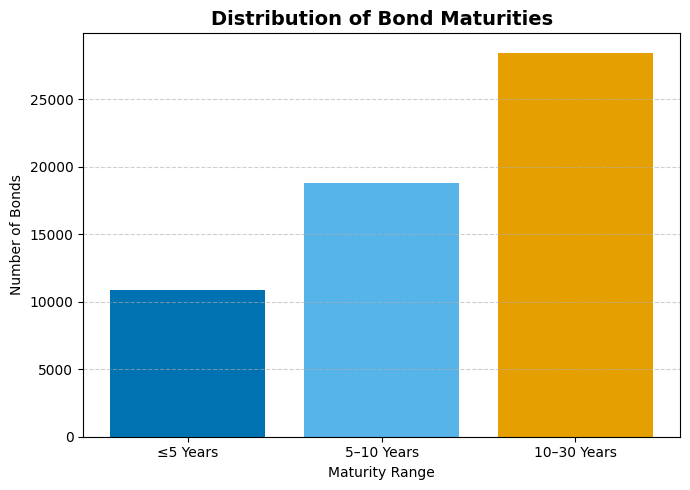

In [54]:
plt.figure(figsize=(7, 5))
plt.bar(maturity_counts.index, maturity_counts.values, color=['#0072B2', '#56B4E9', '#E69F00'])
plt.title('Distribution of Bond Maturities', fontsize=14, fontweight='bold')
plt.xlabel('Maturity Range')
plt.ylabel('Number of Bonds')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [55]:
import pandas as pd

file_path = "/Users/mali/Desktop/UW/Climate Risk/utility_service_area_fire_metrics.csv.gz"
df_fwi = pd.read_csv(file_path)

print(df_fwi.head())

print(df_fwi.columns)

   OBJECTID     ID                           NAME                  ADDRESS  \
0        39  10325  KINGS RIVER CONSERVATION DIST  4886 EAST JENSEN AVENUE   
1        39  10325  KINGS RIVER CONSERVATION DIST  4886 EAST JENSEN AVENUE   
2        39  10325  KINGS RIVER CONSERVATION DIST  4886 EAST JENSEN AVENUE   
3        39  10325  KINGS RIVER CONSERVATION DIST  4886 EAST JENSEN AVENUE   
4        39  10325  KINGS RIVER CONSERVATION DIST  4886 EAST JENSEN AVENUE   

     CITY STATE    ZIP      TELEPHONE                   TYPE COUNTRY  ...  \
0  FRESNO    CA  93725  NOT AVAILABLE  POLITICAL SUBDIVISION     USA  ...   
1  FRESNO    CA  93725  NOT AVAILABLE  POLITICAL SUBDIVISION     USA  ...   
2  FRESNO    CA  93725  NOT AVAILABLE  POLITICAL SUBDIVISION     USA  ...   
3  FRESNO    CA  93725  NOT AVAILABLE  POLITICAL SUBDIVISION     USA  ...   
4  FRESNO    CA  93725  NOT AVAILABLE  POLITICAL SUBDIVISION     USA  ...   

   YEAR Shape__Area Shape__Length               Event_ID     Ig_Date

In [56]:
import pandas as pd

file_path = "/Users/mali/Desktop/UW/Climate Risk/utility_service_area_average_adjusted_gross_income.csv"
df_income = pd.read_csv(file_path)

print(df_income.head())

                      NAME  year  average_adjusted_gross_income
0  ALAMEDA MUNICIPAL POWER  2014                   91317.000794
1  ALAMEDA MUNICIPAL POWER  2015                   96853.516345
2  ALAMEDA MUNICIPAL POWER  2016                  101779.428515
3  ALAMEDA MUNICIPAL POWER  2017                  107502.954142
4  ALAMEDA MUNICIPAL POWER  2018                  115694.469407


In [57]:
df_filtered['Service Area'] = df_filtered['Service Area'].str.strip().str.upper()
df_fwi['NAME'] = df_fwi['NAME'].str.strip().str.upper()

df_merge = df_filtered.merge(
    df_fwi,
    left_on='Service Area',
    right_on='NAME',
    how='left'
)

df_merge = df_merge[(df_merge['CUSTOMERS'] > 0)]
df_merge['trade_date'] = pd.to_datetime(df_merge['trade_date'], errors='coerce')
df_merge['Ig_Date'] = pd.to_datetime(df_merge['Ig_Date'], errors='coerce')

df_merge['days_since_ignition'] = (df_merge['trade_date'] - df_merge['Ig_Date']).dt.days
df_merge.loc[df_merge['days_since_ignition'] < 0, 'days_since_ignition'] = pd.NA

df_merge['NAME'] = df_merge['NAME'].str.strip().str.upper()
df_income['NAME'] = df_income['NAME'].str.strip().str.upper()

df_merge['trade_year'] = df_merge['trade_date'].dt.year

df_merge = df_merge.merge(
    df_income,
    left_on=['NAME', 'trade_year'],
    right_on=['NAME', 'year'],
    how='left'
)

income_2014 = df_income[df_income['year'] == 2014].set_index('NAME')['average_adjusted_gross_income']
income_2022 = df_income[df_income['year'] == 2022].set_index('NAME')['average_adjusted_gross_income']

mask_after_2022 = (df_merge['trade_year'] > 2022) & (df_merge['average_adjusted_gross_income'].isna())
df_merge.loc[mask_after_2022, 'average_adjusted_gross_income'] = df_merge.loc[mask_after_2022, 'NAME'].map(income_2022)

mask_before_2014 = (df_merge['trade_year'] < 2014) & (df_merge['average_adjusted_gross_income'].isna())
df_merge.loc[mask_before_2014, 'average_adjusted_gross_income'] = df_merge.loc[mask_before_2014, 'NAME'].map(income_2014)

print(df_merge)

            cusip trade_date rtrs_control_number trade_type_indicator  \
0       045209AK9 2024-07-25    2024072505266200                    D   
1       045209AK9 2024-07-25    2024072505266200                    D   
2       045209AK9 2024-07-25    2024072505266200                    D   
3       045209AK9 2024-07-25    2024072505266200                    D   
4       045209AK9 2024-07-25    2024072507849300                    S   
...           ...        ...                 ...                  ...   
599289  962468EZ3 2024-10-30    2024103014573300                    D   
599290  962468EZ3 2024-10-30    2024103014573300                    D   
599291  962468EZ3 2024-10-30    2024103014573300                    D   
599292  962468EZ3 2024-10-30    2024103014573300                    D   
599293  962468EZ3 2024-10-30    2024103014573300                    D   

                                     security_description  dated_date  coupon  \
0        ASOTIN CNTY WASH PUB UTIL DIST NO

In [58]:
df_merge['trade_date'] = pd.to_datetime(df_merge['trade_date'], errors='coerce')
df_merge['Ig_Date'] = pd.to_datetime(df_merge['Ig_Date'], errors='coerce')

df_merge['days_since_ignition'] = (df_merge['trade_date'] - df_merge['Ig_Date']).dt.days

trades_within_30 = df_merge[
    (df_merge['days_since_ignition'] >= 0) &
    (df_merge['days_since_ignition'] <= 30)
]

df_merge = trades_within_30.copy()

print(f"Number of trades within 30 days after ignition: {len(trades_within_30)}")
print(df_merge)
print(df_merge.columns)


Number of trades within 30 days after ignition: 3459
            cusip trade_date rtrs_control_number trade_type_indicator  \
3870    082869LG1 2016-07-19    1FE40373C33DC0BA                    D   
3889    082869LG1 2016-07-19    3B7C3424324CBDE7                    S   
3908    082869LG1 2016-07-19    D20A63664D8DA824                    P   
3927    082869LG1 2016-07-19    9218A5E80CBF5099                    D   
3946    082869LG1 2016-08-01    0EBABABD9CE64E29                    D   
...           ...        ...                 ...                  ...   
599085  962468EZ3 2023-08-17    2023081704527700                    P   
599093  962468EZ3 2023-08-17    2023081711386100                    S   
599101  962468EZ3 2023-08-17    2023081711360400                    D   
599109  962468EZ3 2023-08-28    2023082800613900                    D   
599117  962468EZ3 2023-08-28    2023082800624000                    S   

                                     security_description  dated_date 

In [59]:
df_merge['trade_date'] = pd.to_datetime(df_merge['trade_date'], errors='coerce')
df_merge['Ig_Date'] = pd.to_datetime(df_merge['Ig_Date'], errors='coerce')

df_merge['days_since_ignition'] = (df_merge['trade_date'] - df_merge['Ig_Date']).dt.days

valid_trades = df_merge[df_merge['days_since_ignition'] >= 0]

first_trades = valid_trades.sort_values(['Service Area', 'Ig_Date', 'days_since_ignition'])
first_trades = first_trades.groupby(['Service Area', 'Ig_Date']).first().reset_index()

print(f"Number of first trades captured: {len(first_trades)}")

Number of first trades captured: 125


In [60]:
columns_to_keep = [
    "NAME",
    "9-digit CUSIP",
    "trade_date",
    "spread",
    "par_traded",
    "Call Flag",
    "Insurance Flag",
    "CUSTOMERS",
    "average_adjusted_gross_income",
    "fire_severity_mean",
    "fire_severity_max",
    "BurnBndAc",
    "fwi_mean",
    "fwi_max",
    "days_since_ignition",
    "years_to_maturity",
    "coupon"
]

df_final_analysis = df_merge[columns_to_keep].copy()

df_final_analysis.to_csv("df_final_analysis.csv.gz", index=False, compression='gzip')

print("Final dataset prepared with shape:", df_final_analysis.shape)
print(df_final_analysis)


Final dataset prepared with shape: (3459, 17)
                              NAME 9-digit CUSIP trade_date  spread  \
3870     PUD NO 1 OF BENTON COUNTY     082869LG1 2016-07-19     NaN   
3889     PUD NO 1 OF BENTON COUNTY     082869LG1 2016-07-19     NaN   
3908     PUD NO 1 OF BENTON COUNTY     082869LG1 2016-07-19     NaN   
3927     PUD NO 1 OF BENTON COUNTY     082869LG1 2016-07-19     NaN   
3946     PUD NO 1 OF BENTON COUNTY     082869LG1 2016-08-01     NaN   
...                            ...           ...        ...     ...   
599085  PUD NO 1 OF WHATCOM COUNTY     962468EZ3 2023-08-17   0.419   
599093  PUD NO 1 OF WHATCOM COUNTY     962468EZ3 2023-08-17   0.272   
599101  PUD NO 1 OF WHATCOM COUNTY     962468EZ3 2023-08-17   0.272   
599109  PUD NO 1 OF WHATCOM COUNTY     962468EZ3 2023-08-28   0.334   
599117  PUD NO 1 OF WHATCOM COUNTY     962468EZ3 2023-08-28   0.334   

        par_traded Call Flag Insurance Flag  CUSTOMERS  \
3870       30000.0         0              0

In [21]:
na_counts = df_final_analysis.isna().sum()

print("Missing values per column:")
print(na_counts[na_counts > 0])

Missing values per column:
spread    1828
dtype: int64


In [22]:
df_final_analysis_clean = df_final_analysis.dropna().copy()

df_final_analysis_clean.to_csv("df_final_analysis_clean.csv.gz", index=False, compression='gzip')
print(f"Rows before dropping NA: {len(df_final_analysis)}")
print(f"Rows after dropping NA: {len(df_final_analysis_clean)}")

Rows before dropping NA: 3459
Rows after dropping NA: 1631


In [23]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_csv("/Users/mali/Desktop/UW/Climate Risk/df_final_analysis_clean.csv.gz")

df = df.rename(columns={
    "Call Flag": "call_flag",
    "Insurance Flag": "insurance_flag",
    "9-digit CUSIP": "cusip9",
    "average_adjusted_gross_income": "income",
    "fire_severity_mean": "fire_sev_mean",
    "fire_severity_max": "fire_sev_max",
    "fwi_mean": "fwi_mean",
    "fwi_max": "fwi_max",
    "BurnBndAc": "burned_acres",
    "par_traded": "par_traded",
    "CUSTOMERS": "customers",
    "days_since_ignition": "days_since_ignition",
    "spread": "spread",
    "years_to_maturity": "years_to_maturity",
    "coupon": "coupon"
})

df['call_flag'] = df['call_flag'].apply(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)
df['insurance_flag'] = df['insurance_flag'].apply(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)

df['utility_id'] = df['NAME'].astype('category').cat.codes
df['time_id'] = pd.to_datetime(df['trade_date']).dt.to_period('M').astype(str)

dependent = 'spread'
base_controls = [
    "par_traded", "call_flag", "insurance_flag", "customers",
    "income", "burned_acres", "days_since_ignition", "years_to_maturity", "coupon"
]

fire_combinations = [
    ["fire_sev_mean", "fwi_mean"],
    ["fire_sev_mean", "fwi_max"],
    ["fire_sev_max", "fwi_mean"],
    ["fire_sev_max", "fwi_max"]
]

results = []
for severity, fwi in fire_combinations:
    formula = (
        f"{dependent} ~ {' + '.join(base_controls + [severity, fwi])} "
        "+ C(utility_id) + C(time_id)"
    )
    model = smf.ols(formula=formula, data=df).fit()
    results.append({
        "Model": f"{severity} + {fwi}",
        "R-squared": model.rsquared,
        "Adj. R-squared": model.rsquared_adj,
        "AIC": model.aic,
        "BIC": model.bic
    })

summary_df = pd.DataFrame(results)
print(summary_df)


                      Model  R-squared  Adj. R-squared          AIC  \
0  fire_sev_mean + fwi_mean   0.397843        0.385784  2327.530767   
1   fire_sev_mean + fwi_max   0.398743        0.386703  2325.089205   
2   fire_sev_max + fwi_mean   0.396041        0.383947  2332.403327   
3    fire_sev_max + fwi_max   0.397351        0.385282  2328.863254   

           BIC  
0  2505.630071  
1  2503.188509  
2  2510.502631  
3  2506.962558  


In [25]:
import pandas as pd
import statsmodels.formula.api as smf

df['call_flag'] = df['call_flag'].apply(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)
df['insurance_flag'] = df['insurance_flag'].apply(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)

df['utility_id'] = df['NAME'].astype('category').cat.codes
df['time_id'] = pd.to_datetime(df['trade_date']).dt.to_period('M').astype(str)
df['time_id'] = df['time_id'].str.replace('-', '')  # "2023-09" -> "202309"

base_controls = [
    "par_traded", "call_flag", "insurance_flag", "customers",
    "income", "burned_acres", "days_since_ignition", "years_to_maturity", "coupon"
]

fire_combinations = [
    ["fire_sev_mean", "fwi_mean"],
    ["fire_sev_mean", "fwi_max"],
    ["fire_sev_max", "fwi_mean"],
    ["fire_sev_max", "fwi_max"]
]

def run_backward_elimination(df, formula, dep_var="spread", threshold=0.05):
    model = smf.ols(formula=formula, data=df).fit()
    terms = model.model.exog_names
    terms = [t for t in terms if t not in ['Intercept'] and not t.startswith('C(')]

    while True:
        model = smf.ols(formula='{} ~ {}'.format(dep_var, ' + '.join(terms) + ' + C(utility_id) + C(time_id)'), data=df).fit()
        pvals = model.pvalues.drop(labels=['Intercept'], errors='ignore')

        # Filter only original terms (exclude fixed effects)
        worst = pvals[[term for term in pvals.index if term in terms and not term.startswith('C(')]]
        worst = worst[worst > threshold]

        if worst.empty:
            break

        worst_var = worst.idxmax()
        print(f"Removing: {worst_var} (p = {worst[worst_var]:.4f})")
        terms.remove(worst_var)

    final_formula = '{} ~ {}'.format(dep_var, ' + '.join(terms) + ' + C(utility_id) + C(time_id)')
    return smf.ols(formula=final_formula, data=df).fit()

summary_rows = []

for severity, fwi in fire_combinations:
    print(f"\n Running model for: {severity} + {fwi}")
    
    all_vars = base_controls + [severity, fwi]
    full_formula = f"spread ~ {' + '.join(all_vars)} + C(utility_id) + C(time_id)"
    
    full_model = smf.ols(formula=full_formula, data=df).fit()
    
    refined_model = run_backward_elimination(df, full_formula)
    
    summary_rows.append({
        "Model": f"{severity} + {fwi}",
        "Base R²": round(full_model.rsquared, 4),
        "Base AIC": round(full_model.aic, 2),
        "Base BIC": round(full_model.bic, 2),
        "Refined R²": round(refined_model.rsquared, 4),
        "Refined AIC": round(refined_model.aic, 2),
        "Refined BIC": round(refined_model.bic, 2)
    })

summary_df = pd.DataFrame(summary_rows)
print("\n Final Model Comparison Summary:\n")
print(summary_df.to_string(index=False))




 Running model for: fire_sev_mean + fwi_mean
Removing: customers (p = 0.4474)
Removing: call_flag (p = 0.4909)
Removing: insurance_flag (p = 0.4914)
Removing: fwi_mean (p = 0.4299)
Removing: burned_acres (p = 0.0819)
Removing: income (p = 0.0623)
Removing: years_to_maturity (p = 0.0521)

 Running model for: fire_sev_mean + fwi_max
Removing: burned_acres (p = 0.8495)
Removing: customers (p = 0.6082)
Removing: income (p = 0.2104)
Removing: insurance_flag (p = 0.1504)
Removing: call_flag (p = 0.1427)
Removing: years_to_maturity (p = 0.0701)

 Running model for: fire_sev_max + fwi_mean
Removing: burned_acres (p = 0.9351)
Removing: fire_sev_max (p = 0.4375)
Removing: call_flag (p = 0.7742)
Removing: customers (p = 0.3057)
Removing: income (p = 0.1096)
Removing: years_to_maturity (p = 0.0586)

 Running model for: fire_sev_max + fwi_max
Removing: fire_sev_max (p = 0.6634)
Removing: customers (p = 0.4561)
Removing: burned_acres (p = 0.4422)
Removing: income (p = 0.1257)
Removing: years_to_mat

In [26]:
pip install linearmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
%reset -f

import pandas as pd
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

In [28]:
df = pd.read_csv("df_final_analysis_clean.csv.gz")

df = df.rename(columns={
    "Call Flag": "call_flag",
    "Insurance Flag": "insurance_flag",
    "9-digit CUSIP": "cusip9",
    "average_adjusted_gross_income": "income",
    "fire_severity_mean": "fire_sev_mean",
    "fire_severity_max": "fire_sev_max",
    "fwi_mean": "fwi_mean",
    "fwi_max": "fwi_max",
    "BurnBndAc": "burned_acres",
    "par_traded": "par_traded",
    "CUSTOMERS": "customers",
    "days_since_ignition": "days_since_ignition",
    "spread": "spread",
    "years_to_maturity": "years_to_maturity",
    "coupon": "coupon"
})

df['call_flag'] = df['call_flag'].apply(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)
df['insurance_flag'] = df['insurance_flag'].apply(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)

df['utility_id'] = df['NAME'].astype('category').cat.codes
df['time_id'] = pd.to_datetime(df['trade_date']).dt.to_period('M').dt.to_timestamp()
df = df.set_index(['utility_id', 'time_id'])

controls = ["par_traded", "call_flag", "insurance_flag", "customers", "income", "burned_acres", "days_since_ignition", "years_to_maturity", "coupon"]

fire_combinations = [
    ("fire_sev_mean", "fwi_mean"),
    ("fire_sev_mean", "fwi_max"),
    ("fire_sev_max", "fwi_mean"),
    ("fire_sev_max", "fwi_max")
]

results = []

for fire, fwi in fire_combinations:
    df['fire'] = df[fire]
    df['fwi'] = df[fwi]
    df['fire_fwi_interaction'] = df['fire'] * df['fwi']

    exog_vars = controls + ['fire', 'fwi', 'fire_fwi_interaction']
    exog = df[exog_vars].copy()

    exog = exog.loc[:, exog.apply(pd.Series.nunique) > 1]

    if 'const' not in exog.columns:
        exog.insert(0, 'const', 1.0)

    model = PanelOLS(
        df['spread'], exog,
        entity_effects=True,
        time_effects=True,
        drop_absorbed=True,
        check_rank=False
    )

    fit_result = model.fit(cov_type='robust')

    coefs = fit_result.params
    se = fit_result.std_errors
    pvals = fit_result.pvalues

    coef_summary = {
        var: {
            "coef": round(coefs[var], 4),
            "std_err": round(se[var], 4),
            "p_value": round(pvals[var], 4)
        } for var in coefs.index
    }

    results.append({
        "Model": f"{fire} + {fwi}",
        "R-squared (within)": round(fit_result.rsquared, 4),
        "Coefficients": coef_summary
    })


summary_df = pd.DataFrame(results)
print("\n Panel Regression Model Summary:\n")
print(summary_df.to_string(index=False))


 Panel Regression Model Summary:

                   Model  R-squared (within)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Coefficients
fire_sev_mean + fwi_mean              0.0920 {'const': {'coef': 1.0837, 'std_err': 2.9259, 'p_value': 0.7111}, 'par_traded': {'coef': -0.0, 'std_err': 0.0, 'p_value': 0.0}, 'income': {'coef': -0.0, 'std_err': 0.0, 'p_value': 0.6714}, 'burn

/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/4265331872.py:60: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

customers

  fit_result = model.fit(cov_type='robust')
/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/4265331872.py:60: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

customers

  fit_result = model.fit(cov_type='robust')
/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/4265331872.py:60: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

customers

  fit_result = model.fit(cov_type='robust')
/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/4265331872.py:60: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

customers

  fit_result = model.fit(cov_type='robust')


In [40]:
import pandas as pd
from linearmodels import PanelOLS
from IPython.display import display

# --- Load and clean data ---
df = pd.read_csv("df_final_analysis_clean.csv.gz")

df = df.rename(columns={
    "Call Flag": "call_flag",
    "Insurance Flag": "insurance_flag",
    "9-digit CUSIP": "cusip9",
    "average_adjusted_gross_income": "income",
    "fire_severity_mean": "fire_sev_mean",
    "fire_severity_max": "fire_sev_max",
    "fwi_mean": "fwi_mean",
    "fwi_max": "fwi_max",
    "BurnBndAc": "burned_acres",
    "par_traded": "par_traded",
    "CUSTOMERS": "customers",
    "days_since_ignition": "days_since_ignition",
    "spread": "spread",
    "years_to_maturity": "years_to_maturity",
    "coupon": "coupon"
})

df['call_flag'] = df['call_flag'].apply(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)
df['insurance_flag'] = df['insurance_flag'].apply(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)

df['utility_id'] = df['NAME'].astype('category').cat.codes
df['time_id'] = pd.to_datetime(df['trade_date']).dt.to_period('M').dt.to_timestamp()
df = df.set_index(['utility_id', 'time_id'])

# --- Define controls and model variants ---
controls = ["par_traded", "call_flag", "insurance_flag", "customers", "income", 
            "burned_acres", "days_since_ignition", "years_to_maturity", "coupon"]

fire_combinations = [
    ("fire_sev_mean", "fwi_mean"),
    ("fire_sev_mean", "fwi_max"),
    ("fire_sev_max", "fwi_mean"),
    ("fire_sev_max", "fwi_max")
]

results = []

# --- Run models ---
for fire, fwi in fire_combinations:
    df['fire'] = df[fire]
    df['fwi'] = df[fwi]
    df['fire_fwi_interaction'] = df['fire'] * df['fwi']

    exog_vars = controls + ['fire', 'fwi', 'fire_fwi_interaction']
    exog = df[exog_vars].copy()
    exog = exog.loc[:, exog.apply(pd.Series.nunique) > 1]
    if 'const' not in exog.columns:
        exog.insert(0, 'const', 1.0)

    model = PanelOLS(df['spread'], exog,
                     entity_effects=True,
                     time_effects=True,
                     drop_absorbed=True,
                     check_rank=False)
    fit_result = model.fit(cov_type='robust')

    coefs = fit_result.params
    se = fit_result.std_errors
    pvals = fit_result.pvalues

    coef_summary = {
        var: {
            "coef": round(coefs[var], 4),
            "std_err": round(se[var], 4),
            "p_value": round(pvals[var], 4)
        } for var in coefs.index
    }

    results.append({
        "Model": f"{fire} + {fwi}",
        "Coefficients": coef_summary
    })

# --- Extract only desired variables ---
keep_vars = ['fire', 'fwi', 'fire_fwi_interaction', 'days_since_ignition', 'years_to_maturity']

filtered_rows = []
for r in results:
    row = {"Model": r["Model"]}
    coef_dict = r["Coefficients"]

    for var in keep_vars:
        coef = coef_dict.get(var, {}).get("coef", None)
        pval = coef_dict.get(var, {}).get("p_value", None)

        # Flip sign for days_since_ignition
        if var == "days_since_ignition" and coef is not None:
            coef = -coef

        # Always record coef
        row[f"{var}_coef"] = coef

        # Only add p-values for these
        if var in ['fire', 'fwi', 'fire_fwi_interaction']:
            row[f"{var}_pval"] = pval

    filtered_rows.append(row)

summary_df = pd.DataFrame(filtered_rows)
summary_df = summary_df.round(4)

# --- Column order ---
ordered_cols = [
    "Model",
    "fire_coef", "fire_pval",
    "fwi_coef", "fwi_pval",
    "fire_fwi_interaction_coef", "fire_fwi_interaction_pval",
    "days_since_ignition_coef",
    "years_to_maturity_coef"
]
summary_df = summary_df[[c for c in ordered_cols if c in summary_df.columns]]

# --- Display + export ---
display(summary_df)


/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/2115964258.py:63: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

customers

  fit_result = model.fit(cov_type='robust')
/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/2115964258.py:63: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

customers

  fit_result = model.fit(cov_type='robust')
/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/2115964258.py:63: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

customers

  fit_result = model.fit(cov_type='robust')
/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/2115964258.py:63: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

customers

  fit_result = model.fit(cov_type='robust')


,Model,fire_coef,fire_pval,fwi_coef,fwi_pval,fire_fwi_interaction_coef,fire_fwi_interaction_pval,days_since_ignition_coef,years_to_maturity_coef
0,fire_sev_mean + fwi_mean,0.4117,0.0062,0.0229,0.0546,-0.0109,0.0349,-0.0128,0.0048
1,fire_sev_mean + fwi_max,0.5114,0.0025,0.0297,0.0184,-0.0146,0.0078,-0.0127,0.0047
2,fire_sev_max + fwi_mean,0.1008,0.1980,0.0062,0.4582,-0.0026,0.2257,-0.0132,0.0048
3,fire_sev_max + fwi_max,0.1199,0.1310,0.0076,0.3500,-0.0036,0.0969,-0.0131,0.0046


In [30]:
import pandas as pd
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

df = pd.read_csv("df_final_analysis_clean.csv.gz")

df = df.rename(columns={
    "Call Flag": "call_flag",
    "Insurance Flag": "insurance_flag",
    "9-digit CUSIP": "cusip9",
    "average_adjusted_gross_income": "income",
    "fire_severity_mean": "fire_sev_mean",
    "fire_severity_max": "fire_sev_max",
    "fwi_mean": "fwi_mean",
    "fwi_max": "fwi_max",
    "BurnBndAc": "burned_acres",
    "par_traded": "par_traded",
    "CUSTOMERS": "customers",
    "days_since_ignition": "days_since_ignition",
    "spread": "spread",
    "years_to_maturity": "years_to_maturity",
    "coupon": "coupon"
})

df['call_flag'] = df['call_flag'].apply(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)
df['insurance_flag'] = df['insurance_flag'].apply(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)

df['utility_id'] = df['NAME'].astype('category').cat.codes
df['time_id'] = pd.to_datetime(df['trade_date']).dt.to_period('M').dt.to_timestamp()
df = df.set_index(['utility_id', 'time_id'])

controls = ["par_traded", "call_flag", "insurance_flag", "customers", "income", "burned_acres", "days_since_ignition", "years_to_maturity", "coupon"]
fire_combinations = [
    ("fire_sev_mean", "fwi_mean"),
    ("fire_sev_mean", "fwi_max"),
    ("fire_sev_max", "fwi_mean"),
    ("fire_sev_max", "fwi_max")
]

results = []

for fire, fwi in fire_combinations:
    df['fire'] = df[fire]
    df['fwi'] = df[fwi]
    df['fire_fwi_interaction'] = df['fire'] * df['fwi']

    exog_vars = controls + ['fire', 'fwi', 'fire_fwi_interaction']
    exog = df[exog_vars].copy()
    exog = exog.loc[:, exog.apply(pd.Series.nunique) > 1]
    if 'const' not in exog.columns:
        exog.insert(0, 'const', 1.0)

    full_model = PanelOLS(df['spread'], exog,
                          entity_effects=True,
                          time_effects=True,
                          drop_absorbed=True,
                          check_rank=False)
    full_result = full_model.fit(cov_type='robust')

    pvals = full_result.pvalues
    sig_vars = [var for var in pvals.index if pvals[var] <= 0.05]

    if len(sig_vars) < 2:
        print(f"⚠️ Model {fire} + {fwi} skipped (not enough significant variables).")
        continue

    exog_reduced = exog[sig_vars]
    if 'const' not in exog_reduced.columns:
        exog_reduced.insert(0, 'const', 1.0)

    reduced_model = PanelOLS(df['spread'], exog_reduced,
                             entity_effects=True,
                             time_effects=True,
                             drop_absorbed=True,
                             check_rank=False)
    reduced_result = reduced_model.fit(cov_type='robust')

    results.append({
        "Model": f"{fire} + {fwi}",
        "Included Vars": sig_vars,
        "R-squared": round(reduced_result.rsquared, 4)
    })

summary_df = pd.DataFrame(results)
print("\n Refitted Models After p-value Filtering:\n")
print(summary_df.to_string(index=False))



 Refitted Models After p-value Filtering:

                   Model                                                                            Included Vars  R-squared
fire_sev_mean + fwi_mean [par_traded, days_since_ignition, years_to_maturity, coupon, fire, fire_fwi_interaction]     0.0885
 fire_sev_mean + fwi_max               [par_traded, days_since_ignition, coupon, fire, fwi, fire_fwi_interaction]     0.0924
 fire_sev_max + fwi_mean                             [par_traded, days_since_ignition, years_to_maturity, coupon]     0.0801
  fire_sev_max + fwi_max                                                [par_traded, days_since_ignition, coupon]     0.0777


/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/2032396050.py:58: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

customers

  full_result = full_model.fit(cov_type='robust')
/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/2032396050.py:58: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

customers

  full_result = full_model.fit(cov_type='robust')
/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/2032396050.py:58: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

customers

  full_result = full_model.fit(cov_type='robust')
/var/folders/wn/71qjkk5x53bgsw9kg2hwvp3m0000gn/T/ipykernel_63203/2032396050.py:58: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

customers

  full_result = full_model.fit(cov_type='robust')
